In [72]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from dateutil.parser import parse
import scipy.stats as stats

In [73]:
movie_df = pd.read_csv("data/all_movies_with_twitter.csv")

movie_df.head()

,row,rank,movie_title,studio,total_gross,total_theater,opening_weekend_gross,opening_theater_count,release_date,close_date,twitter1,twitter2,twitter3,twitter4,twitter5
0,1,90,Eighth Grade,A24,"$1,648,837",158,"$263,797",4,8/3/18,-,EighthGrade,NaN,NaN,NaN,NaN
1,2,57,Mission: Impossible - Fallout,Par.,"$77,526,635","4,386","$61,236,534","4,386",7/27/18,-,MissionImpossible,MissionImpossibleFallout,NaN,NaN,NaN
2,3,84,Teen Titans Go! To The Movies,WB,"$13,640,501","3,188","$10,411,189","3,188",7/27/18,-,TeenTitansGOMovie,NaN,NaN,NaN,NaN
3,4,91,Princess Mononoke - Studio Ghibli (2018),Fathom,"$1,464,271",739,"$489,847",739,7/22/18,-,princessmononoke,NaN,NaN,NaN,NaN
4,5,22,Mamma Mia! Here We Go Again,Uni.,"$60,227,525","3,514","$34,952,180","3,317",7/20/18,-,MammaMia2,NaN,NaN,NaN,NaN


In [74]:
# parse out release month in number & name
movie_df["ReleaseMonth"] = ""
movie_df["ReleaseMonthName"] = ""


for i in movie_df.index:
    releaseDT = parse(movie_df.loc[i,  "release_date"])
    #print (releaseDT)
    ReleaseMonth = int(releaseDT.strftime("%m"))
    #print(ReleaseMonth)
    movie_df.loc[i, "ReleaseMonth"] = ReleaseMonth
    ReleaseMonthName = releaseDT.strftime("%B")
    #print(ReleaseMonth)
    movie_df.loc[i, "ReleaseMonthName"] = ReleaseMonthName
    

movie_df.head() 
#movie_df["ReleaseMonth"].head()
#movie_df.to_csv("data/MovieByReleaseMonth.csv", index=False)


,row,rank,movie_title,studio,total_gross,total_theater,opening_weekend_gross,opening_theater_count,release_date,close_date,twitter1,twitter2,twitter3,twitter4,twitter5,ReleaseMonth,ReleaseMonthName
0,1,90,Eighth Grade,A24,"$1,648,837",158,"$263,797",4,8/3/18,-,EighthGrade,NaN,NaN,NaN,NaN,8,August
1,2,57,Mission: Impossible - Fallout,Par.,"$77,526,635","4,386","$61,236,534","4,386",7/27/18,-,MissionImpossible,MissionImpossibleFallout,NaN,NaN,NaN,7,July
2,3,84,Teen Titans Go! To The Movies,WB,"$13,640,501","3,188","$10,411,189","3,188",7/27/18,-,TeenTitansGOMovie,NaN,NaN,NaN,NaN,7,July
3,4,91,Princess Mononoke - Studio Ghibli (2018),Fathom,"$1,464,271",739,"$489,847",739,7/22/18,-,princessmononoke,NaN,NaN,NaN,NaN,7,July
4,5,22,Mamma Mia! Here We Go Again,Uni.,"$60,227,525","3,514","$34,952,180","3,317",7/20/18,-,MammaMia2,NaN,NaN,NaN,NaN,7,July


In [75]:
# convert opening_weekend_gross from string to float
movie_df.loc[:,['opening_weekend_gross']] = \
     movie_df['opening_weekend_gross'].apply(lambda x: float( x.replace('$','').replace(',','') )\
                                       if type(x) is str else -1.0)

movie_df.loc[:,['opening_theater_count']] = \
     movie_df['opening_theater_count'].apply(lambda x: float( x.replace('$','').replace(',','') )\
                                       if type(x) is str else -1.0)

movie_df.head()
movie_df.to_csv("data/MovieByReleaseMonth.csv", index=False)


In [76]:
# check if the limited release movies skewed the numbers
# Converting a GroupBy object into a DataFrame
# Group by Release Month, then get mean of box office for each group

wideRelease_df = movie_df.loc[movie_df["opening_theater_count"] >= 2000]
    
wideReleasegroupByMonth =  wideRelease_df.groupby(["ReleaseMonthName", "ReleaseMonth"])

WRgroupByReleaseMonth_df = pd.DataFrame({'Release Count' :wideReleasegroupByMonth.size()})
WRgroupByReleaseMonth_df["Total Opening Weekend Gross"] = pd.DataFrame(wideReleasegroupByMonth["opening_weekend_gross"].sum())
WRgroupByReleaseMonth_df["Mean Opening Weekend Gross (Mil)"] = WRgroupByReleaseMonth_df["Total Opening Weekend Gross"] / WRgroupByReleaseMonth_df["Release Count"] / 1000000


WRgroupByReleaseMonthSorted_df = WRgroupByReleaseMonth_df.sort_values(by =["ReleaseMonth"])
#groupByReleaseMonthSorted_df.columns
#type(groupByReleaseMonthSorted_df)
WRgroupByReleaseMonthSorted_df


,,Release Count,Total Opening Weekend Gross,Mean Opening Weekend Gross (Mil)
ReleaseMonthName,ReleaseMonth,,,
January,1,7,1.194320e+08,17.061709
February,2,8,3.187044e+08,39.838053
March,3,14,2.199482e+08,15.710582
April,4,7,4.140909e+08,59.155841
May,5,7,2.667771e+08,38.111010
June,6,33,1.246699e+09,37.778762
July,7,28,1.075689e+09,38.417459
August,8,15,3.680589e+08,24.537261
September,9,21,4.315470e+08,20.549859


In [77]:
WRgroupByReleaseMonthSorted_df.reset_index(level=0, inplace=True)
WRgroupByReleaseMonthSorted_df

,ReleaseMonthName,Release Count,Total Opening Weekend Gross,Mean Opening Weekend Gross (Mil)
ReleaseMonth,,,,
1,January,7,1.194320e+08,17.061709
2,February,8,3.187044e+08,39.838053
3,March,14,2.199482e+08,15.710582
4,April,7,4.140909e+08,59.155841
5,May,7,2.667771e+08,38.111010
6,June,33,1.246699e+09,37.778762
7,July,28,1.075689e+09,38.417459
8,August,15,3.680589e+08,24.537261
9,September,21,4.315470e+08,20.549859


In [78]:
WRplot_df = WRgroupByReleaseMonthSorted_df[["ReleaseMonthName", "Mean Opening Weekend Gross (Mil)"]]
WRplot_df.set_index("ReleaseMonthName", inplace=True)

WRplot_df

,Mean Opening Weekend Gross (Mil)
ReleaseMonthName,
January,17.061709
February,39.838053
March,15.710582
April,59.155841
May,38.111010
June,37.778762
July,38.417459
August,24.537261
September,20.549859


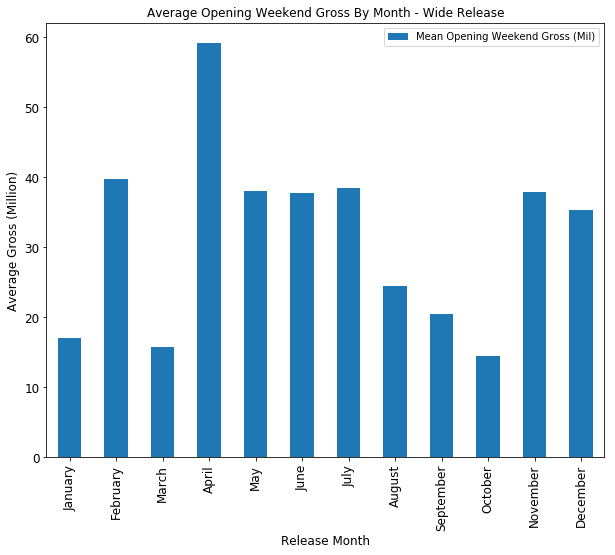

In [81]:
ax = WRplot_df.plot(kind='bar', \
                  title = 'Average Opening Weekend Gross By Month - Wide Release',\
                  figsize=(10, 8), legend=True, fontsize=12 )


ax.set_xlabel("Release Month", fontsize=12)
ax.set_ylabel("Average Gross (Million)", fontsize=12)
plt.show()

In [82]:
# Extract individual groups
#  jc - into LISTS

WRMovies_df =  movie_df[movie_df["opening_theater_count"] >= 2000]
WRMovies_df.head()

January = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "January"]["opening_weekend_gross"].tolist()
February = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "February"]["opening_weekend_gross"].tolist()
March = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "March"]["opening_weekend_gross"].tolist()
April = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "April"]["opening_weekend_gross"].tolist()
May = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "May"]["opening_weekend_gross"].tolist()
June = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "June"]["opening_weekend_gross"].tolist()
July = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "July"]["opening_weekend_gross"].tolist()
August = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "August"]["opening_weekend_gross"].tolist()
September = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "September"]["opening_weekend_gross"].tolist()
October = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "October"]["opening_weekend_gross"].tolist()
November = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "November"]["opening_weekend_gross"].tolist()
December = WRMovies_df[WRMovies_df["ReleaseMonthName"] == "December"]["opening_weekend_gross"].tolist()


stats.f_oneway(January,February, March, April, May, June, July, August, September, October, November, December )


F_onewayResult(statistic=1.4549843251462857, pvalue=0.15190003048354314)